# Lab 7  -  Stellar evolution

In this lab you will look at the evolutionary tracks for stars of different masses to find their life stages.

Make sure to read the instructions carefully and answer any written questions within the notebook.

There are also a few optional bonus steps, if you have extra time or would like a challenge.

Astronomy skills:
- Stefan-Boltzmann law
- HR diagram
- stellar evolution


Python skills:
- math
- selecting subsets







## Set up
Run the cell below to read in the packages you'll need for this lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1 - read in the model tracks

We are going to use simulated stellar evolution tracks from the [MIST](https://waps.cfa.harvard.edu/MIST/index.html) computer models, which predict how the temperature and luminosity of a star changes over time. The models start at the main sequence and end just after the asymptotic giant branch.


There are three models included in the Lab 07 folder:
- model_1Msun.csv = model for a 1 solar mass star
- model_2Msun.csv = model for a 2 solar mass star
- model_5Msun.csv = model for a 5 solar mass star

These files have four columns: evolutionary phase (index), time (in years), effective temperature (in K), and luminosity (in J/s).

Write some code below to read in all of these files and their data.

In [ ]:
# code here

phase1, time1, teff1, lumin1 = np.loadtxt('model_1Msun.csv', delimiter=',', skiprows=1, unpack=True)

phase2, time2, teff2, lumin2 = np.loadtxt('model_2Msun.csv', delimiter=',', skiprows=1, unpack=True)

phase5, time5, teff5, lumin5 = np.loadtxt('model_5Msun.csv', delimiter=',', skiprows=1, unpack=True)


## Step 2 - HR diagram

Make a plot of the HR diagram showing all 3 model tracks.

As usual, your plot should have:
- axis labels
- blue stars to the left
- bright stars at the top.
- logarithmic axes

Here is an example for logarithmic axis scaling:
```
plt.plot(x,y)
plt.xscale('log')   # change x axis scaling
plt.yscale('log')   # change y axis scaling
```

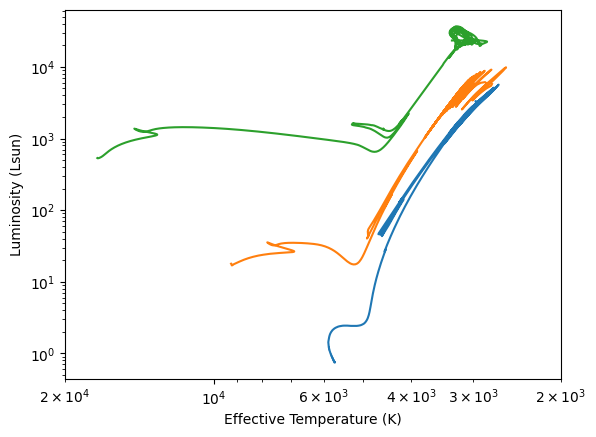

In [ ]:
# code here

plt.plot(teff1, lumin1)
plt.plot(teff2, lumin2)
plt.plot(teff5, lumin5)

plt.xlabel('Effective Temperature (K)')
plt.ylabel('Luminosity (Lsun)')

plt.xlim(20000, 2000)

plt.xscale('log')
plt.yscale('log')

plt.show()

## Step 3 - Mystery stars

Let's look at some mystery stars:
1. star 1 with T = 4700 K and L = 12 Lsun
2. star 2 with T = 8600 K and L = 20 Lsun
3. star 3 with T = 5000 K and L = 1700 Lsun
4. star 4 with T = 3500 K and L = 10,000 Lsun

Write some code below to calculate the radius of each star in solar radii).  Reminder that you can find the values of common constants [here](http://userpages.irap.omp.eu/~sbottinelli/Downloads/ism-constants.pdf).




In [5]:
# code here

# Stefan-Boltzmann Law:  L = 4 pi R^2 sigma T^4
#  R = sqrt(  L / 4 pi sigma T^4  )   needs SI units

radius1 = ( (12*3.85e26) / (4 * np.pi * 5.67e-8 * 4700**4) )**0.5  /  6.96e8      # Rsun
print(radius1)

radius2 = ( (20*3.85e26) / (4 * np.pi * 5.67e-8 * 8600**4) )**0.5  /  6.96e8      # Rsun
print(radius2)

radius3 = ( (1700*3.85e26) / (4 * np.pi * 5.67e-8 * 5000**4) )**0.5  /  6.96e8      # Rsun
print(radius3)

radius4 = ( (10000*3.85e26) / (4 * np.pi * 5.67e-8 * 3500**4) )**0.5  /  6.96e8      # Rsun
print(radius4)

5.237446151679469
2.019494892020325
55.08192578054036
272.63937341608687


**Question:**  Which star is the biggest? Which is the smallest?

In [ ]:
# write your answers here

# biggest = Star 4

# smallest = Star 2

Make a copy of your HR diagram from Step 2, and overplot these mystery stars as single points.

Hint: `plt.scatter()` might be easier to use with single points, but `plt.plot()` will work too if you specify the [symbol](https://matplotlib.org/stable/api/markers_api.html).

Optional: Add a legend so a viewer knows which line goes with which model and which point goes with which mystery star!

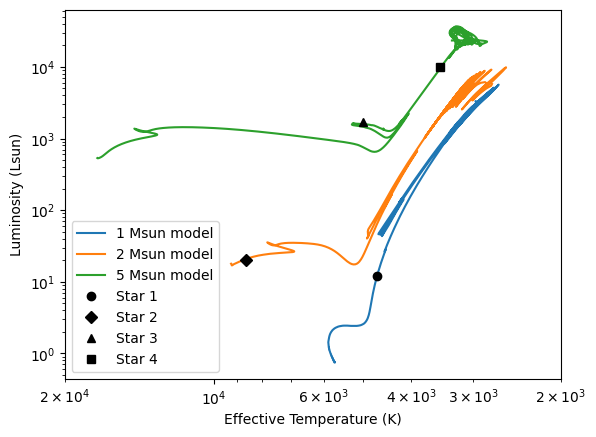

In [ ]:
# code here

plt.plot(teff1, lumin1, label='1 Msun model')
plt.plot(teff2, lumin2, label='2 Msun model')
plt.plot(teff5, lumin5, label='5 Msun model')

plt.plot(4700, 12, 'ko', label='Star 1')
plt.plot(8600, 20, 'kD', label='Star 2')
plt.plot(5000, 1700, 'k^', label='Star 3')
plt.plot(3500, 10000, 'ks', label='Star 4')

plt.xlabel('Effective Temperature (K)')
plt.ylabel('Luminosity (Lsun)')

plt.xlim(20000, 2000)
plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.show()

**Question:**
What is the likely mass and evolutionary stage for each of the four mystery stars?


In [ ]:
# write your answers here:

# Star 1 - 1 Msun, red giant branch

# Star 2 - 2 Msun, main sequence

# Star 3 - 5 Msun, horizontal branch

# Star 4 - 5 Msun, asymptotic giant branch

## Step 4 - Age estimates

We can use computer models to estimate the ages of real stars.

Let's start with mystery Star 1 (T = 4700 K and L = 12 Lsun). We want to find the closest point on the model evolutionary track to the star's real properties, then the age of this point will tell us the age of the mystery star.

1. Calculate the distance from Star 1's location on the HR diagram to all the other points in the model track (that matches best).

2. Find the index of the model point with the minimum distance to the observed parameters. (Hint, we used `np.argmax()` in Labs 2 & 6 to find the index of the *maximum*...)

3. Find the corresponding time (age) for this model point.

In [ ]:
# code here

# calculate distance
# r^2 = x^2 + y^2
d = np.sqrt( (teff1 - 4700)**2  +  (lumin1 - 12)**2 )

# find minimum location
i = np.argmin(d)

# find corresponding age
age = time1[i]

print(age/1e9, 'Gyr')

11.11976038773 Gyr


**Self check**: You should get an age of about 11.1 billion years! If you didn't, check in with your neighbor or professor to see what's going wrong.

Next, find the ages for the other mystery stars using the same method. Make sure to use the model track that best fits each star!

In [ ]:
# code here

# star 2    T = 8600 K and L = 20 Lsun
d = np.sqrt( (teff2 - 8600)**2  +  (lumin2 - 20)**2 )
i = np.argmin(d)
age = time1[i]

print('star 2', age/1e9, 'Gyr')

star 2 3.2121654108390003 Gyr


In [ ]:
# star 3   T = 5000 K and L = 1700 Lsun
d = np.sqrt( (teff5 - 5000)**2  +  (lumin5 - 1700)**2 )
i = np.argmin(d)
age = time1[i]

print('star 3', age/1e9, 'Gyr')

star 4 11.443419524388 Gyr


In [ ]:
# star 4   T = 3500 K and L = 10,000 Lsun
d = np.sqrt( (teff5 - 8600)**2  +  (lumin5 - 10000)**2 )
i = np.argmin(d)
age = time1[i]

print('star 4', age/1e9, 'Gyr')

star 3 11.460124266268998 Gyr


---
## Questions
Which mystery star is the youngest? ... the oldest? ... the furthest along in its evolution?

  

In [ ]:
# write your answers here

# Star 2 is the youngest at 3.2 Gyr and Star 4 is the oldest at 11.5 Gyr

# Star 3 is the furthest along in its evolution, because AGB is the last stage before a low mas star dies


---
## Bonus [optional]

If you have time left over, look at each of the evolutionary phases individually. This uses the "phase" column in the data files, where each stage of evolution gets a certain number:
- 0 = main sequence
- 2 = red giant branch
- 3 = horizontal branch
- 4, 5 = asymptotic giant branch

Choose one evolutionary model to investigate in more detail, then either:
1. write some code to plot this evolutionary track with each evolutionary stage as a different color line.

or

2. write some code to calculate how long each evolutionary stage lasts.



In [6]:
# optional code here


---
## Final steps

**Turning in your lab**

If using Colab -- Click File --> Save a copy to Drive. Save the file to your shared Lab folder.


If using Jupyter --
Save this notebook to your computer, then upload it to your shared Lab folder in Google Drive.